# Imports

In [3]:
import os
import warnings
import sys

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn import linear_model, preprocessing, metrics, model_selection
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
from mlflow.tracking import MlflowClient

import seaborn as sn

if 'inline_rc' not in dir():
    inline_rc = dict(mpl.rcParams)

SEED = 10
np.random.seed(SEED)

In [4]:
mpl.rcParams.update(inline_rc)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}
mpl.rc('font', **font)
lines = {'linewidth' : 3}
mpl.rc('lines', **lines)

In [5]:
registered_model_name = 'modelo_projeto_kobe'
min_precision = 0.7
model_version = -1 # recuperar a ultima versao
nexamples = 4

# Diagrama do Pipeline do Projeto

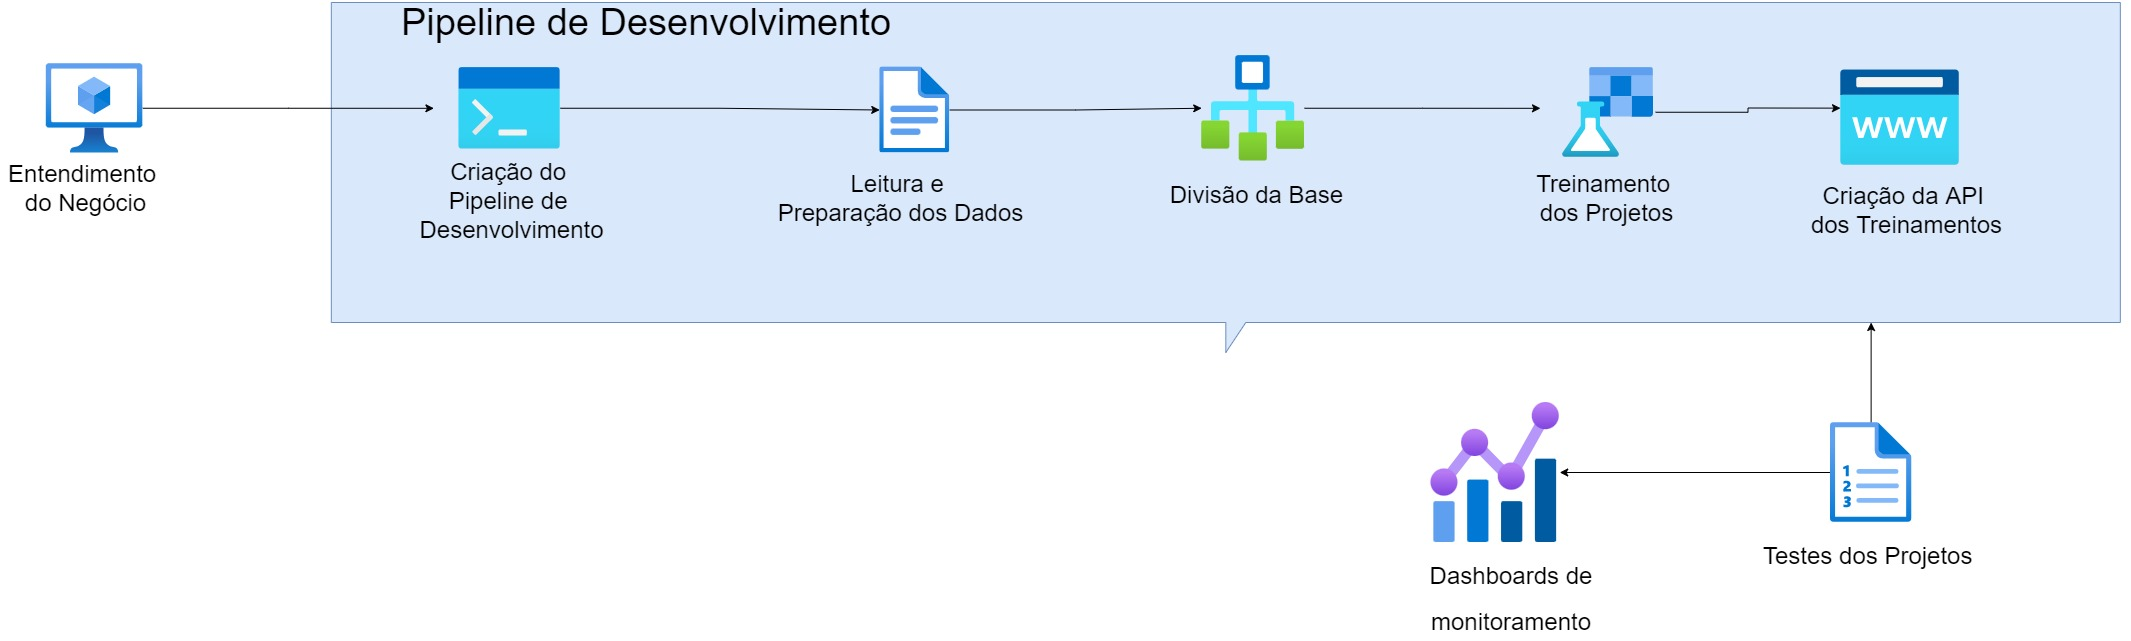

# Pipelines dos Arremessos Kobe Bryant

Neste momento torna-se necessário variar os pipelines de forma que poderemos aproveitar os dados estruturados para avaliar e verificar se os experimentos foram bem feitos e se pode haver uma melhoria nos dados descritos

## Inicio dos Pipelines 

In [21]:
!mlflow ui --backend-store-uri sqlite:///mlruns.db

^C


In [6]:
# Para usar o sqlite como repositorio
mlflow.set_tracking_uri("sqlite:///mlruns.db")

experiment_name = 'Projeto Black Mamba'
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
    experiment = mlflow.get_experiment(experiment_id)
experiment_id = experiment.experiment_id

## Pipeline para a Preparação dos Dados Kobe Bryant

In [7]:
# COLOCAR RUN DE LEITURA DE DADOS
# PARAMETROS: top_features,
# METRICS: SHAPE de cada base de dados
# ARTIFACTS: nenhum




with mlflow.start_run(experiment_id=experiment_id, run_name = 'PreparacaoDados'):
    df_kobe = pd.read_csv('Data/kobe_dataset.csv',sep=',')
    kobe_target_col = 'shot_made_flag'
    df_kobe_2p = df_kobe[df_kobe['shot_type'] == '2PT Field Goal']
    df_kobe_3p = df_kobe[df_kobe['shot_type'] == '3PT Field Goal']
    df_kobe_2p = df_kobe_2p[['lat','lon','minutes_remaining','period', 'playoffs','shot_distance','shot_made_flag']]
    df_kobe_3p = df_kobe_3p[['lat','lon','minutes_remaining','period', 'playoffs','shot_distance','shot_made_flag']]
    df_kobe_2p = df_kobe_2p.dropna()
    df_kobe_3p = df_kobe_3p.dropna()
    test_size = 0.2
    
    # Separar parte para compor a base de operacao
    df_kobe_2p, data_operation, ytrain, ytest = model_selection.train_test_split(df_kobe_2p, 
                                                                            df_kobe_2p[kobe_target_col],
                                                                            test_size=test_size)
    df_kobe_2p[kobe_target_col]      = ytrain
    data_operation[kobe_target_col] = ytest


    df_kobe_2p.to_parquet('data_filtered.parquet')
    data_operation.to_parquet('base_8020.parquet')
    
    # LOG DE PARAMETROS DO MODELO
    mlflow.log_param("test_size", test_size)

    # LOG DE METRICAS GLOBAIS
    mlflow.log_metric("data_dev", df_kobe_2p.shape[0])
    mlflow.log_metric("data_operation", data_operation.shape[0])
   
    
mlflow.end_run()

print('== Bases de Dados ==')
print(f'data_kobe_2p {df_kobe_2p.shape}')
print(f'data_operation {data_operation.shape}')
print(f'Columns: {df_kobe_2p.columns}')

== Bases de Dados ==
data_kobe_2p (16228, 7)
data_operation (4057, 7)
Columns: Index(['lat', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'shot_distance', 'shot_made_flag'],
      dtype='object')
